# Gruppenarbeit KW 44, 30.10.2023-02.11.2023
Im folgenden Praxisprojekt soll eine Gruppenarbeit simuliert werden, wie diese auch in dem IHK-Modul auftreten kann. Ihr werden für diese Arbeit in Gruppen mit jeweils 4 Personen aufgeteilt, welche dann an dem Projekt arbeiten sollen. Für jede Gruppe stehen alle Informationen frei zu Verfügung, die sich direkt unter dem Link abrufen lassen, eine Kurzzusammenfassung findet ihr auch im weiteren Verlauf dieser Aufgabenstellung. Sollten hierbei Variablen nicht vollständig beschrieben werden oder nicht klar werden, welche Inhalte die Variable umfasst, so muss dafür entweder eine begründete Annahme getroffen werden wie diese Interpretiert wird oder eine begründete Annahme erfolgen, warum diese ausgeschlossen werden sollte.

Folgendes soll vorbereitet werden:

Datenanalyse per Python
- Strukturierter Workflow (Datenimport, Datenbereinigung, Datentransformation, Datenanalyse, Datenexport)
- Explorative Datenanalyse zu den importieren Daten
- Datenanalyse per Machine Learning mit Bewertung, Optimierungs- und Stabilitätstests
- Einfache (grafische) Darstellung der Ergebnisse

Datenvisualisierung
- Bericht oder Dashboard mit Visualisierung der Daten
- Interaktive Elemente zur flexiblen Erkundung der Informationen
- Darstellung des Zusammenhangs der Informationen (Welche Geschichte soll erzählt werden?)
- Kurze Dokumentation der Datenbearbeitung (reicht in Power-BI, zB als extra Berichtsseite / Willkommensblatt)
- 
Präsentation
- Eine 30-minütige Präsentation, in welcher die Problemstellung erläutert, das Vorgehen dargestellt und begründet wird und letztlich die Problemstellung mit einem Fazit beantwortet wird.
- In dieser Präsentation dürfen Ausschnitte des Codes verwendet werden, wenn diese nötig sind, um das Vorgehen zu verstehen. Achtung: Geht davon aus, dass der Kunde vor euch keine Ahnung von Code hat!
- Das Power-BI Dashboard darf live gezeigt werden.

Es ist ausdrücklich KEINE Projektbeschreibungsdatei als extra nötig – konzentriert euch in dieser Zeit unbedingt vollkommen auf die Skripte/Boards, die Gruppenarbeit und das Verstehen des Datensatzes.

# Gruppe 4
## Personen: **Benjamin, Klaus, Svetlana, Viktor**
##### Thema: **South German Credit, „700 good and 300 bad credits with 20 predictor variables. Data from 1973 to 1975.“**
Link: **http://archive.ics.uci.edu/dataset/573/south+german+credit+update**
##### Abhängige Variable: **kredit**

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from SupportFunctions import annotate_bar_perc

In [3]:
SouthGermanCredit = pd.read_csv('SouthGermanCredit.csv')
SouthGermanCredit

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [4]:
SouthGermanCredit.isna().sum()

laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
kredit      0
dtype: int64

In [5]:
SouthGermanCredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [6]:
SouthGermanCredit.columns

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')

In [7]:
SouthGermanCredit['famges'].unique()

array([2, 3, 4, 1], dtype=int64)

In [8]:
SouthGermanCredit['famges']

0      2
1      3
2      2
3      3
4      3
      ..
995    3
996    3
997    3
998    3
999    3
Name: famges, Length: 1000, dtype: int64

In [9]:
SouthGermanCredit.describe()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [10]:
#######################################################################################################################################
SouthGermanCredit.columns

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')

#### laufkont = status

status: **Art des bestehenden Kontos**
                                               
 1 : no checking account -> **Kein Girokonto vorhanden**                     
 2 : ... < 0 DM                                
 3 : 0<= ... < 200 DM                          
 4 : ... >= 200 DM / salary for at least 1 year -> **Gehalt seit mindestens 1 Jahr**

In [11]:
# Spalte 1
SouthGermanCredit['laufkont'].unique()

array([1, 2, 4, 3], dtype=int64)

In [12]:
SouthGermanCredit['laufkont'].value_counts()

laufkont
4    394
1    274
2    269
3     63
Name: count, dtype: int64

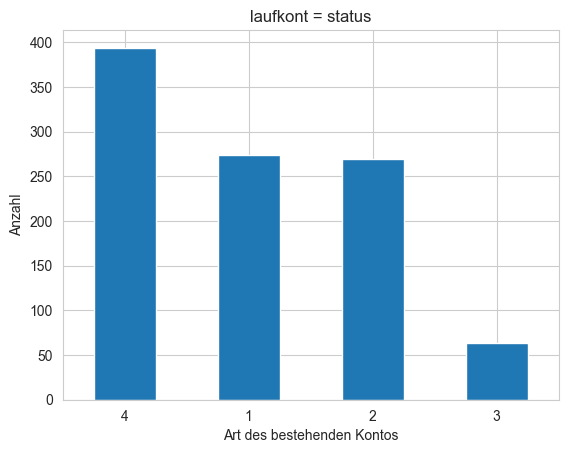

In [13]:
status = { 1:'Kein Girokonto vorhanden ', 2:'Stand < 0 DM', 3:' 0 <= Stand < 200 DM ', 4:'Stand >= 200 DM'}

SouthGermanCredit.laufkont.value_counts().plot(kind="bar", title="laufkont = status", xlabel='Art des bestehenden Kontos', ylabel="Anzahl", rot=0)
plt.show()

#### laufzeit = duration

duration: **Laufzeit des Kredits in Monaten**

In [14]:
# Spalte 2
SouthGermanCredit['laufzeit'].unique()

array([18,  9, 12, 10,  8,  6, 24, 11, 30, 48, 36, 15, 42, 21, 27, 33, 28,
        4, 47, 14, 39, 60,  5, 22, 54, 13, 16,  7, 20, 26, 45, 72, 40],
      dtype=int64)

In [15]:
SouthGermanCredit['laufzeit'].value_counts()

laufzeit
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
45      5
39      5
7       5
14      4
13      4
28      3
33      3
54      2
22      2
16      2
5       1
47      1
26      1
72      1
40      1
Name: count, dtype: int64

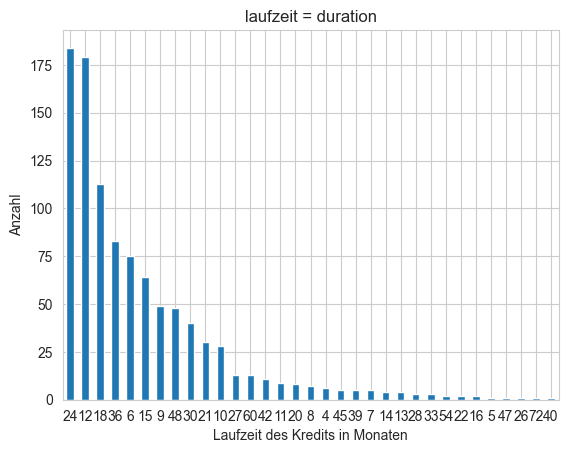

In [16]:
SouthGermanCredit.laufzeit.value_counts().plot(kind="bar", title="laufzeit = duration", xlabel="Laufzeit des Kredits in Monaten", ylabel="Anzahl", rot=0)
plt.show()

#### moral = credit_history

credit_history: **Kreditgeschichte**
                                                
 0 : delay in paying off in the past -> **Verzögerung bei der Tilgung in der Vergangenheit**            
 1 : critical account/other credits elsewhere -> **Kritisches Konto/andere Kredite anderswo**
 2 : no credits taken/all credits paid back duly -> **Keine Kredite aufgenommen/alle Kredite ordnungsgemäß zurückgezahlt**
 3 : existing credits paid back duly till now -> **Bestehende Kredite bisher ordnungsgemäß zurückgezahlt**
 4 : all credits at this bank paid back duly -> **Alle Kredite bei dieser Bank ordnungsgemäß zurückgezahlt**

In [17]:
# Spalte 3
SouthGermanCredit['moral'].unique()

array([4, 2, 3, 0, 1], dtype=int64)

In [18]:
SouthGermanCredit['moral'].value_counts()

moral
2    530
4    293
3     88
1     49
0     40
Name: count, dtype: int64

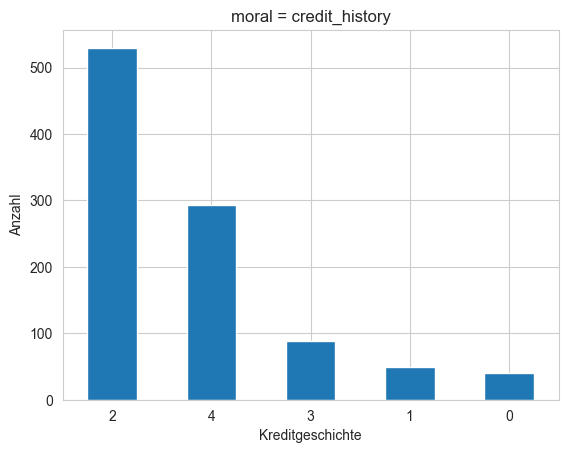

In [19]:
SouthGermanCredit.moral.value_counts().plot(kind="bar", title="moral = credit_history", xlabel="Kreditgeschichte", ylabel="Anzahl", rot=0)
plt.show()

#### verw = purpose

purpose: **Verwendungszweck des Kredits**
                        
 0 : others -> **Sonstige**       
 1 : car (new) -> **Auto (neu)**      
 2 : car (used) -> **Auto (gebraucht)**       
 3 : furniture/equipment -> **Möbel/Ausstattung**
 4 : radio/television -> **Radio/Fernsehen**  
 5 : domestic appliances -> **Haushaltsgeräte**
 6 : repairs -> **Reparaturen**          
 7 : education -> **Bildung**         
 8 : vacation -> **Urlaub**         
 9 : retraining -> **Umschulung**        
 10 : business -> **Geschäft** 

In [20]:
# Spalte 4
SouthGermanCredit['verw'].unique() #????????????

array([ 2,  0,  9,  3,  1, 10,  5,  4,  6,  8], dtype=int64)

In [21]:
SouthGermanCredit['verw'].value_counts() # ??????????????????

verw
3     280
0     234
2     181
1     103
9      97
6      50
5      22
10     12
4      12
8       9
Name: count, dtype: int64

In [22]:
SouthGermanCredit.head(1) # ????????????????????????????????????????????????

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1


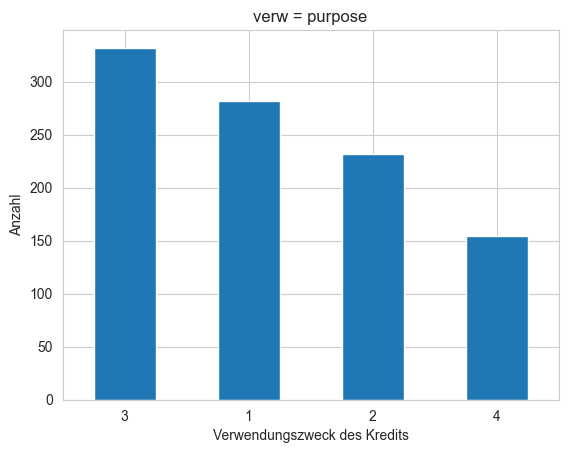

In [23]:
SouthGermanCredit.verm.value_counts().plot(kind="bar", title="verw = purpose", xlabel="Verwendungszweck des Kredits", ylabel="Anzahl", rot=0)
plt.show() # ??????????????????????????????????????????????????????????????????????????????????????

#### hoehe = amount

amount: **Kreditsumme in DM**

In [24]:
# Spalte 5
SouthGermanCredit['hoehe'].unique()

array([ 1049,  2799,   841,  2122,  2171,  2241,  3398,  1361,  1098,
        3758,  3905,  6187,  1957,  7582,  1936,  2647,  3939,  3213,
        2337,  7228,  3676,  3124,  2384,  1424,  4716,  4771,   652,
        1154,  3556,  4796,  3017,  3535,  6614,  1376,  1721,   860,
        1495,  1934,  3378,  3868,   996,  1755,  1028,  2825,  1239,
        1216,  1258,  1864,  1474,  1382,   640,  3919,  1224,  2331,
        6313,   385,  1655,  1053,  3160,  3079,  1163,  2679,  3578,
       10875,  1344,  1237,  3077,  2284,  1567,  2032,  2745,  1867,
        2299,   929,  3399,  2030,  3275,  1940,  1602,  1979,  2022,
        3342,  5866,  2360,  1520,  3651,  2346,  4454,   666,  1965,
        1995,  2991,  4221,  1364,  6361,  4526,  3573,  4455,  2136,
        5954,  3777,   806,  4712,  7432,  1851,  1393,  1412,  1473,
        1533,  2012,  3959,   428,  2366,   763,  3976,  6260,  1919,
        2603,   936,  3062,  4795,  5842,  2063,  1459,  1213,  5103,
         874,  2978,

In [25]:
SouthGermanCredit['hoehe'].sum()

3271248

<Axes: xlabel='hoehe', ylabel='alter'>

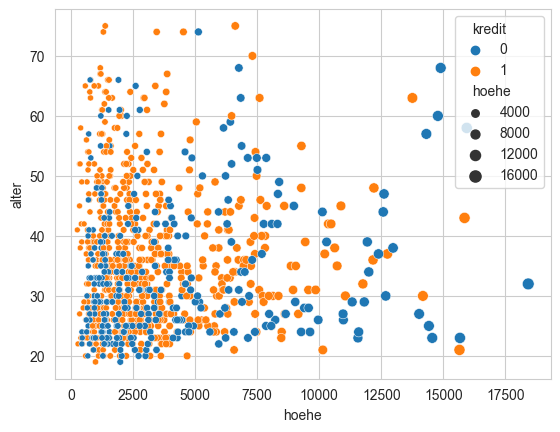

In [26]:
sns.scatterplot(data=SouthGermanCredit, x=SouthGermanCredit['hoehe'], y=SouthGermanCredit['alter'], size=SouthGermanCredit['hoehe'], hue=SouthGermanCredit['kredit'])


#### sparkont = savings

savings: **Art des Sparkontos**
                               
 1 : unknown/no savings account -> **Unbekannt/kein Sparkonto vorhanden**
 2 : ... <  100 DM             
 3 : 100 <= ... <  500 DM      
 4 : 500 <= ... < 1000 DM      
 5 : ... >= 1000 DM   

In [82]:
# Spalte 6
SouthGermanCredit['sparkont'].unique()

array([1, 2, 3, 5, 4], dtype=int64)

In [83]:
SouthGermanCredit['sparkont'].value_counts()

sparkont
1    603
5    183
2    103
3     63
4     48
Name: count, dtype: int64

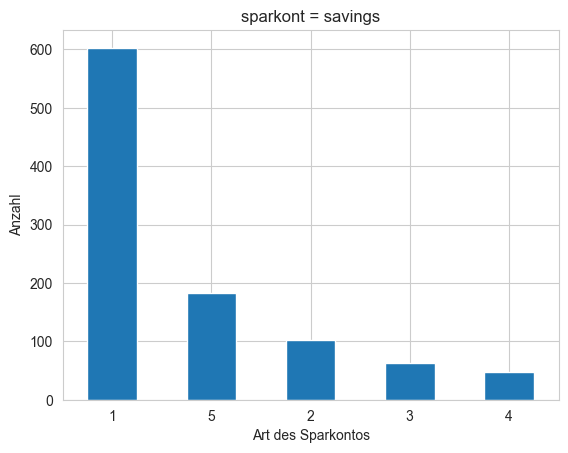

In [81]:
SouthGermanCredit.sparkont.value_counts().plot(kind="bar", title="sparkont = savings", xlabel="Art des Sparkontos", ylabel="Anzahl", rot=0)
plt.show()

#### beszeit = employment_duration

employment_duration: **Beschäftigungsdauer**
                     
 1 : unemployed -> **Arbeitslos**      
 2 : < 1 yr          
 3 : 1 <= ... < 4 yrs -> **Jahre**
 4 : 4 <= ... < 7 yrs -> **Jahre**
 5 : >= 7 yrs  

In [30]:
# Spalte 7
SouthGermanCredit['beszeit'].unique()

array([2, 3, 4, 1, 5], dtype=int64)

In [31]:
SouthGermanCredit['beszeit'].value_counts()

beszeit
3    339
5    253
4    174
2    172
1     62
Name: count, dtype: int64

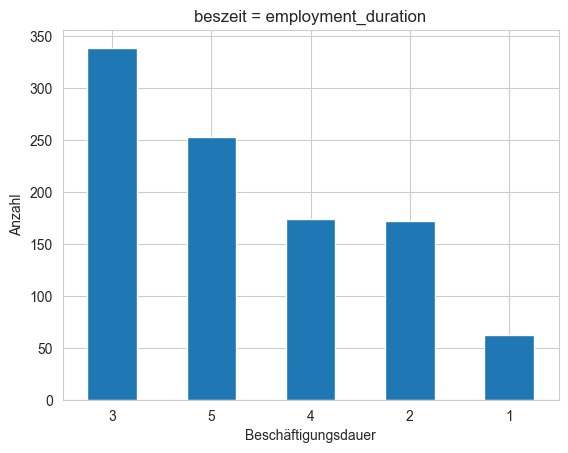

In [32]:
SouthGermanCredit.beszeit.value_counts().plot(kind="bar", title="beszeit = employment_duration", xlabel="Beschäftigungsdauer", ylabel="Anzahl", rot=0)
plt.show()

#### rate = installment_rate

installment_rate: **Ratenhöhe**
                   
 1 : >= 35         
 2 : 25 <= ... < 35
 3 : 20 <= ... < 25
 4 : < 20   

In [33]:
# Spalte 8
SouthGermanCredit['rate'].unique()

array([4, 2, 3, 1], dtype=int64)

In [34]:
SouthGermanCredit['rate'].value_counts()

rate
4    476
2    231
3    157
1    136
Name: count, dtype: int64

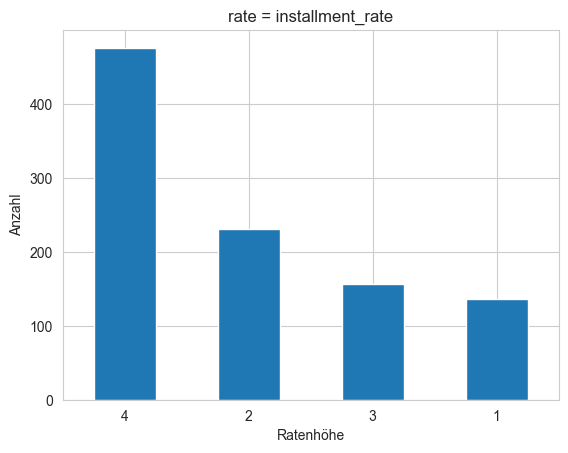

In [35]:
SouthGermanCredit.rate.value_counts().plot(kind="bar", title="rate = installment_rate", xlabel="Ratenhöhe", ylabel="Anzahl", rot=0)
plt.show()

#### famges = personal_status_sex

personal_status_sex: **Familienstand/Geschlecht**
                                         
 1 : male : divorced/separated -> **Männlich: Geschieden/getrennt**      
 2 : female : non-single or male : single -> **Weiblich: Nicht ledig oder männlich: Ledig**
 3 : male : married/widowed -> **Männlich: Verheiratet/verwitwet**             
 4 : female : single -> **Weiblich: Ledig**

In [36]:
# Spalte 9
SouthGermanCredit['famges'].unique()

array([2, 3, 4, 1], dtype=int64)

In [37]:
SouthGermanCredit['famges'].value_counts()

famges
3    548
2    310
4     92
1     50
Name: count, dtype: int64

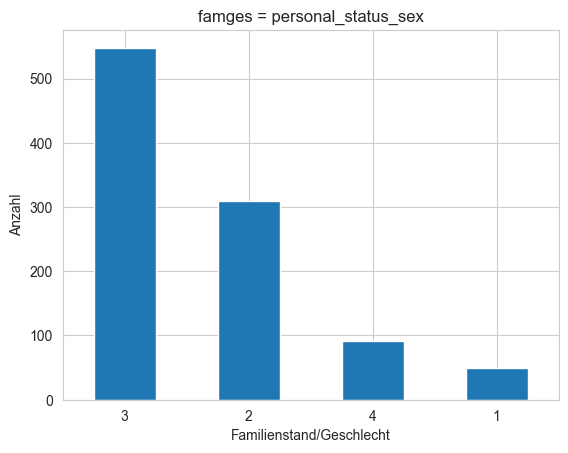

In [38]:
SouthGermanCredit.famges.value_counts().plot(kind="bar", title="famges = personal_status_sex", xlabel="Familienstand/Geschlecht", ylabel="Anzahl", rot=0)
plt.show()

#### buerge = other_debtors

other_debtors: **Andere Schuldner**
                 
 1 : none -> **Keine**       
 2 : co-applicant -> **Mitkreditnehmer**
 3 : guarantor -> **Bürge**   

In [39]:
# Spalte 10
SouthGermanCredit['buerge'].unique()

array([1, 3, 2], dtype=int64)

In [40]:
SouthGermanCredit['buerge'].value_counts()

buerge
1    907
3     52
2     41
Name: count, dtype: int64

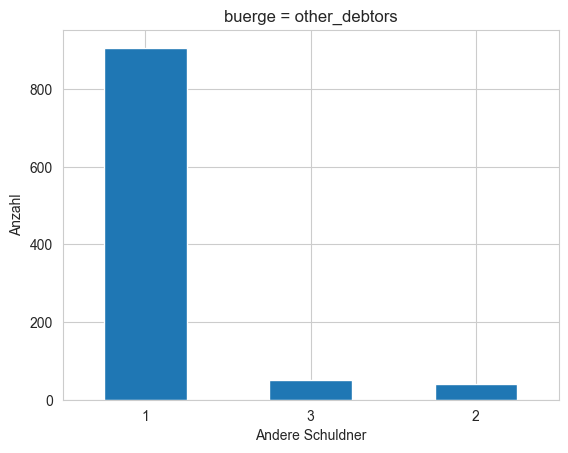

In [41]:
SouthGermanCredit.buerge.value_counts().plot(kind="bar", title="buerge = other_debtors", xlabel="Andere Schuldner", ylabel="Anzahl", rot=0)
plt.show()

#### wohnzeit = present_residence

present_residence: **Wohnzeit an der aktuellen Adresse**
                     
 1 : < 1 yr          
 2 : 1 <= ... < 4 yrs
 3 : 4 <= ... < 7 yrs
 4 : >= 7 yrs  

In [42]:
# Spalte 11
SouthGermanCredit['wohnzeit'].unique()

array([4, 2, 3, 1], dtype=int64)

In [43]:
SouthGermanCredit['wohnzeit'].value_counts()

wohnzeit
4    413
2    308
3    149
1    130
Name: count, dtype: int64

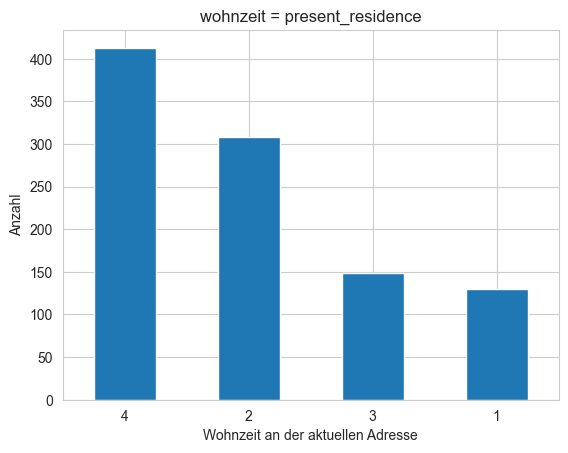

In [44]:
SouthGermanCredit.wohnzeit.value_counts().plot(kind="bar", title="wohnzeit = present_residence", xlabel="Wohnzeit an der aktuellen Adresse", ylabel="Anzahl", rot=0) # ?????????????????????????????????????????????????????????????
plt.show()

#### verm = property

property: **Eigentum**
                                              
 1 : unknown / no property -> **Unbekannt/kein Eigentum vorhanden**                   
 2 : car or other -> **Auto oder anderes**                            
 3 : building soc. savings agr./life insurance -> **Bausparkasse/Lebensversicherung**
 4 : real estate -> **Immobilie**   

In [45]:
# Spalte 12
SouthGermanCredit['verm'].unique()

array([2, 1, 3, 4], dtype=int64)

In [46]:
SouthGermanCredit['verm'].value_counts()

verm
3    332
1    282
2    232
4    154
Name: count, dtype: int64

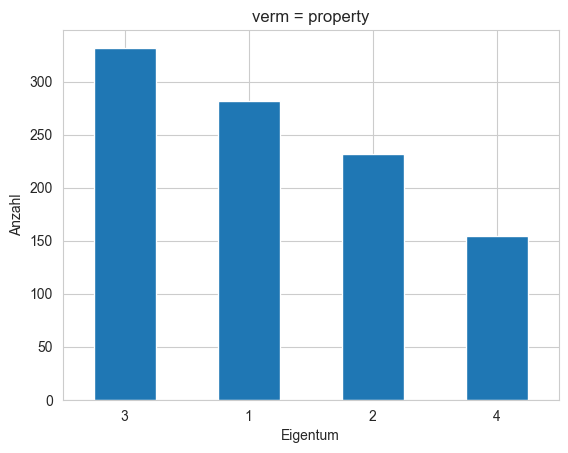

In [47]:
SouthGermanCredit.verm.value_counts().plot(kind="bar", title="verm = property", xlabel="Eigentum", ylabel="Anzahl", rot=0)
plt.show()

#### alter = age

age: **Alter in Jahren**

In [48]:
# Spalte 13
SouthGermanCredit['alter'].unique()

array([21, 36, 23, 39, 38, 48, 40, 65, 24, 31, 44, 25, 37, 49, 33, 26, 51,
       29, 56, 47, 34, 28, 41, 58, 61, 30, 63, 27, 45, 43, 52, 22, 60, 32,
       35, 42, 59, 54, 64, 46, 74, 50, 20, 55, 53, 19, 57, 66, 68, 70, 67,
       75, 62], dtype=int64)

In [49]:
SouthGermanCredit['alter'].min()

19

In [50]:
SouthGermanCredit['alter'].mean()

35.542

In [51]:
SouthGermanCredit['alter'].max()

75

In [52]:
SouthGermanCredit['alter'].value_counts()

alter
27    50
26    49
23    48
24    45
28    43
35    40
25    40
36    40
30    40
31    38
29    37
32    34
33    33
34    33
37    29
22    27
40    27
38    24
42    22
39    21
46    18
44    17
43    17
47    17
41    17
45    15
21    14
20    14
49    14
48    12
54    10
50    10
52     9
57     9
55     8
63     8
51     8
53     7
61     7
60     6
66     5
64     5
58     5
65     5
74     4
67     3
68     3
59     3
56     3
19     2
75     2
62     2
70     1
Name: count, dtype: int64

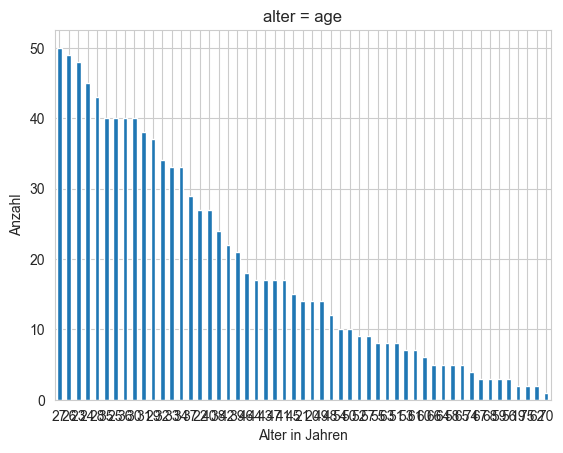

In [53]:
SouthGermanCredit.alter.value_counts().plot(kind="bar", title="alter = age", xlabel="Alter in Jahren", ylabel="Anzahl", rot=0)
plt.show()

<Axes: ylabel='alter'>

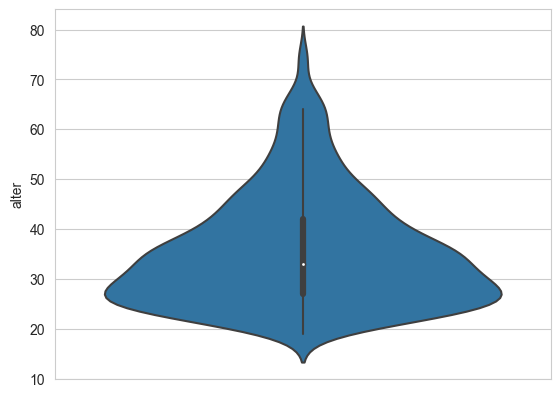

In [54]:
sns.violinplot(data=SouthGermanCredit, y=SouthGermanCredit['alter'])

#### weitkred = other_installment_plans

other_installment_plans: **Andere Ratenzahlungspläne**
           
 1 : bank -> **Bank**
 2 : stores -> **Geschäfte**
 3 : none -> **Keine**

In [55]:
# Spalte 14
SouthGermanCredit['weitkred'].unique()

array([3, 1, 2], dtype=int64)

In [56]:
SouthGermanCredit['weitkred'].value_counts()

weitkred
3    814
1    139
2     47
Name: count, dtype: int64

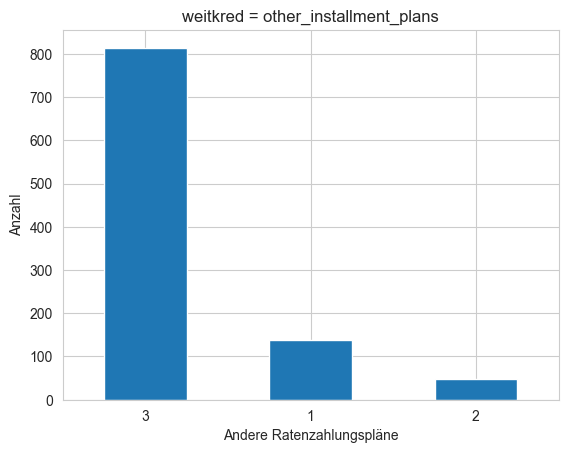

In [57]:
SouthGermanCredit.weitkred.value_counts().plot(kind="bar", title="weitkred = other_installment_plans", xlabel="Andere Ratenzahlungspläne", ylabel="Anzahl", rot=0)
plt.show()

#### wohn = housing

housing: **Wohnsituation**
             
 1 : for free -> **Kostenlos**
 2 : rent -> **Miete**
 3 : own -> **Eigenheim**

In [58]:
# Spalte 15
SouthGermanCredit['wohn'].unique()

array([1, 2, 3], dtype=int64)

In [59]:
SouthGermanCredit['wohn'].value_counts()

wohn
2    714
1    179
3    107
Name: count, dtype: int64

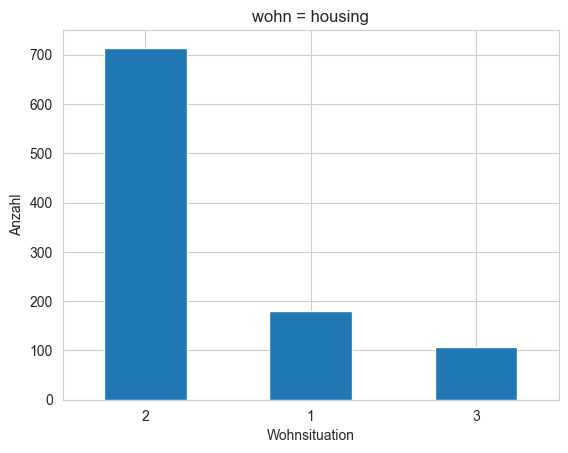

In [60]:
SouthGermanCredit.wohn.value_counts().plot(kind="bar", title="wohn = housing", xlabel="Wohnsituation", ylabel="Anzahl", rot=0)
plt.show()

#### bishkred = number_credits

number_credits: **Anzahl der Kredite**
         
 1 : 1   
 2 : 2-3 
 3 : 4-5 
 4 : >= 6

In [61]:
# Spalte 16
SouthGermanCredit['bishkred'].unique()

array([1, 2, 3, 4], dtype=int64)

In [62]:
SouthGermanCredit['bishkred'].value_counts()

bishkred
1    633
2    333
3     28
4      6
Name: count, dtype: int64

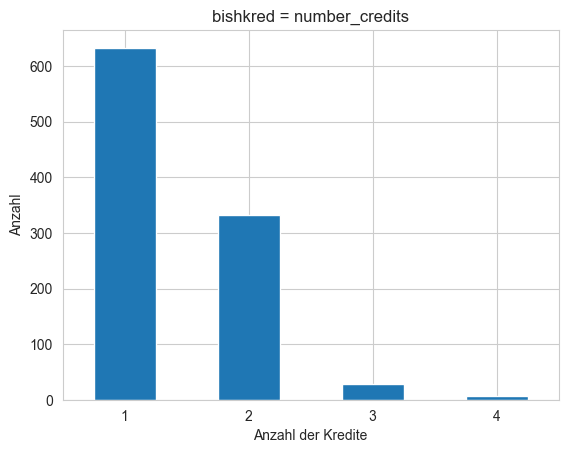

In [63]:
SouthGermanCredit.bishkred.value_counts().plot(kind="bar", title="bishkred = number_credits", xlabel="Anzahl der Kredite", ylabel="Anzahl", rot=0)
plt.show()

#### beruf = job

job: **Beruf**
                                               
 1 : unemployed/unskilled - non-resident -> **Arbeitslos/ungelernt - Nichtansässiger**       
 2 : unskilled - resident -> **Ungelernt - Ansässiger**                    
 3 : skilled employee/official -> **Facharbeiter/Beamter**                
 4 : manager/self-empl./highly qualif. employee -> **Manager/Selbstständig/Hochqualifizierter Angestellter**

In [64]:
# Spalte 17
SouthGermanCredit['beruf'].unique()

array([3, 2, 1, 4], dtype=int64)

In [65]:
SouthGermanCredit['beruf'].value_counts()

beruf
3    630
2    200
4    148
1     22
Name: count, dtype: int64

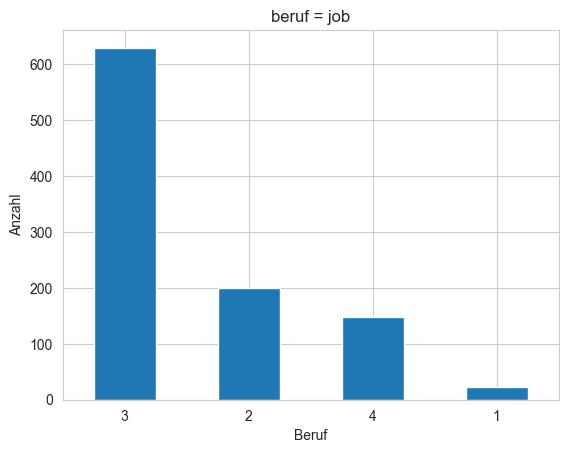

In [66]:
SouthGermanCredit.beruf.value_counts().plot(kind="bar", title="beruf = job", xlabel="Beruf", ylabel="Anzahl", rot=0)
plt.show()

#### pers = people_liable

people_liable: **Anzahl der im Haushalt haftenden Personen**
              
 1 : 3 or more -> **3 oder mehr**
 2 : 0 to 2 -> **0 bis 2** 

In [67]:
# Spalte 18
SouthGermanCredit['pers'].unique()

array([2, 1], dtype=int64)

In [68]:
SouthGermanCredit['pers'].value_counts()

pers
2    845
1    155
Name: count, dtype: int64

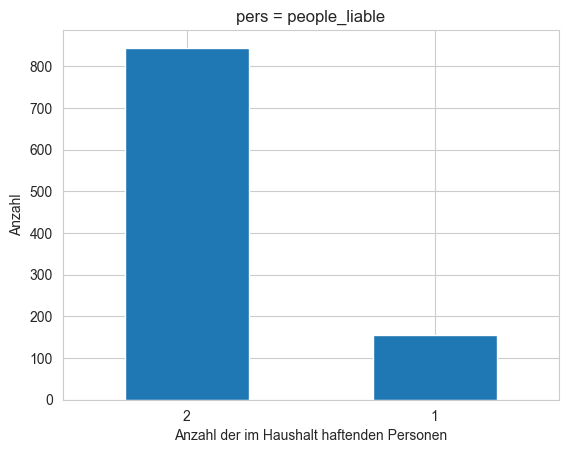

In [69]:
SouthGermanCredit.pers.value_counts().plot(kind="bar", title="pers = people_liable", xlabel="Anzahl der im Haushalt haftenden Personen", ylabel="Anzahl", rot=0)
plt.show()

#### telef = telephone

telephone: **Telefon vorhanden**
                              
 1 : no -> **Nein**                   
 2 : yes (under customer name) -> **Ja (auf den Namen des Kunden)**

In [70]:
# Spalte 19
SouthGermanCredit['telef'].unique()

array([1, 2], dtype=int64)

In [71]:
SouthGermanCredit['telef'].value_counts()

telef
1    596
2    404
Name: count, dtype: int64

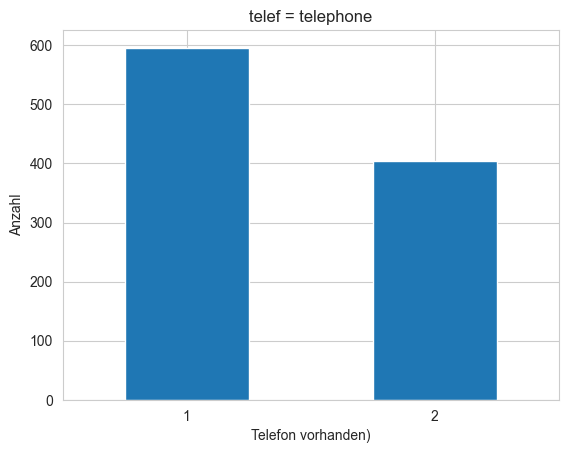

In [72]:
SouthGermanCredit.telef.value_counts().plot(kind="bar", title="telef = telephone", xlabel="Telefon vorhanden)", ylabel="Anzahl", rot=0)
plt.show()

#### gastarb = foreign_worker

foreign_worker: **Ausländischer Arbeiter**
        
 1 : yes -> **Ja**
 2 : no -> **Nein**

In [73]:
# Spalte 20
SouthGermanCredit['gastarb'].unique()

array([2, 1], dtype=int64)

In [74]:
SouthGermanCredit['gastarb'].value_counts()

gastarb
2    963
1     37
Name: count, dtype: int64

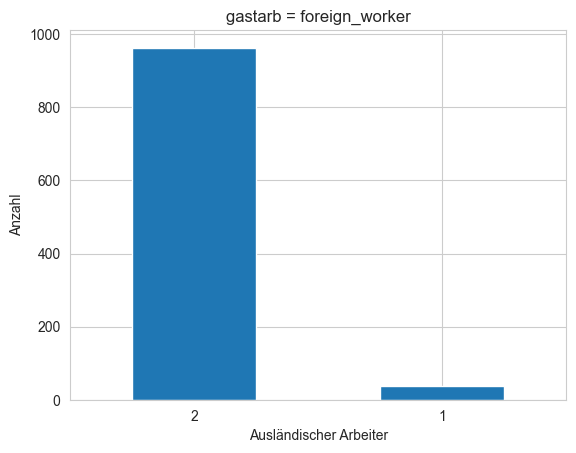

In [75]:
SouthGermanCredit.gastarb.value_counts().plot(kind="bar", title="gastarb = foreign_worker", xlabel="Ausländischer Arbeiter", ylabel="Anzahl", rot=0)
plt.show()

# Abhängige Variable: kredit

#### kredit = credit_risk

credit_risk: **Kreditrisiko**
         
 0 : bad -> **Schlecht**
 1 : good -> **Gut**

In [76]:
# Spalte 21
SouthGermanCredit['kredit'].unique()

array([1, 0], dtype=int64)

In [77]:
SouthGermanCredit['kredit'].value_counts()

kredit
1    700
0    300
Name: count, dtype: int64

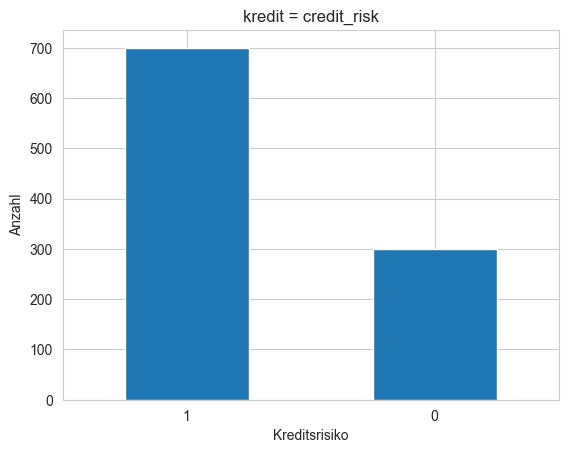

In [78]:
SouthGermanCredit.kredit.value_counts().plot(kind="bar", title="kredit = credit_risk", xlabel="Kreditsrisiko", ylabel="Anzahl", rot=0)
plt.show()

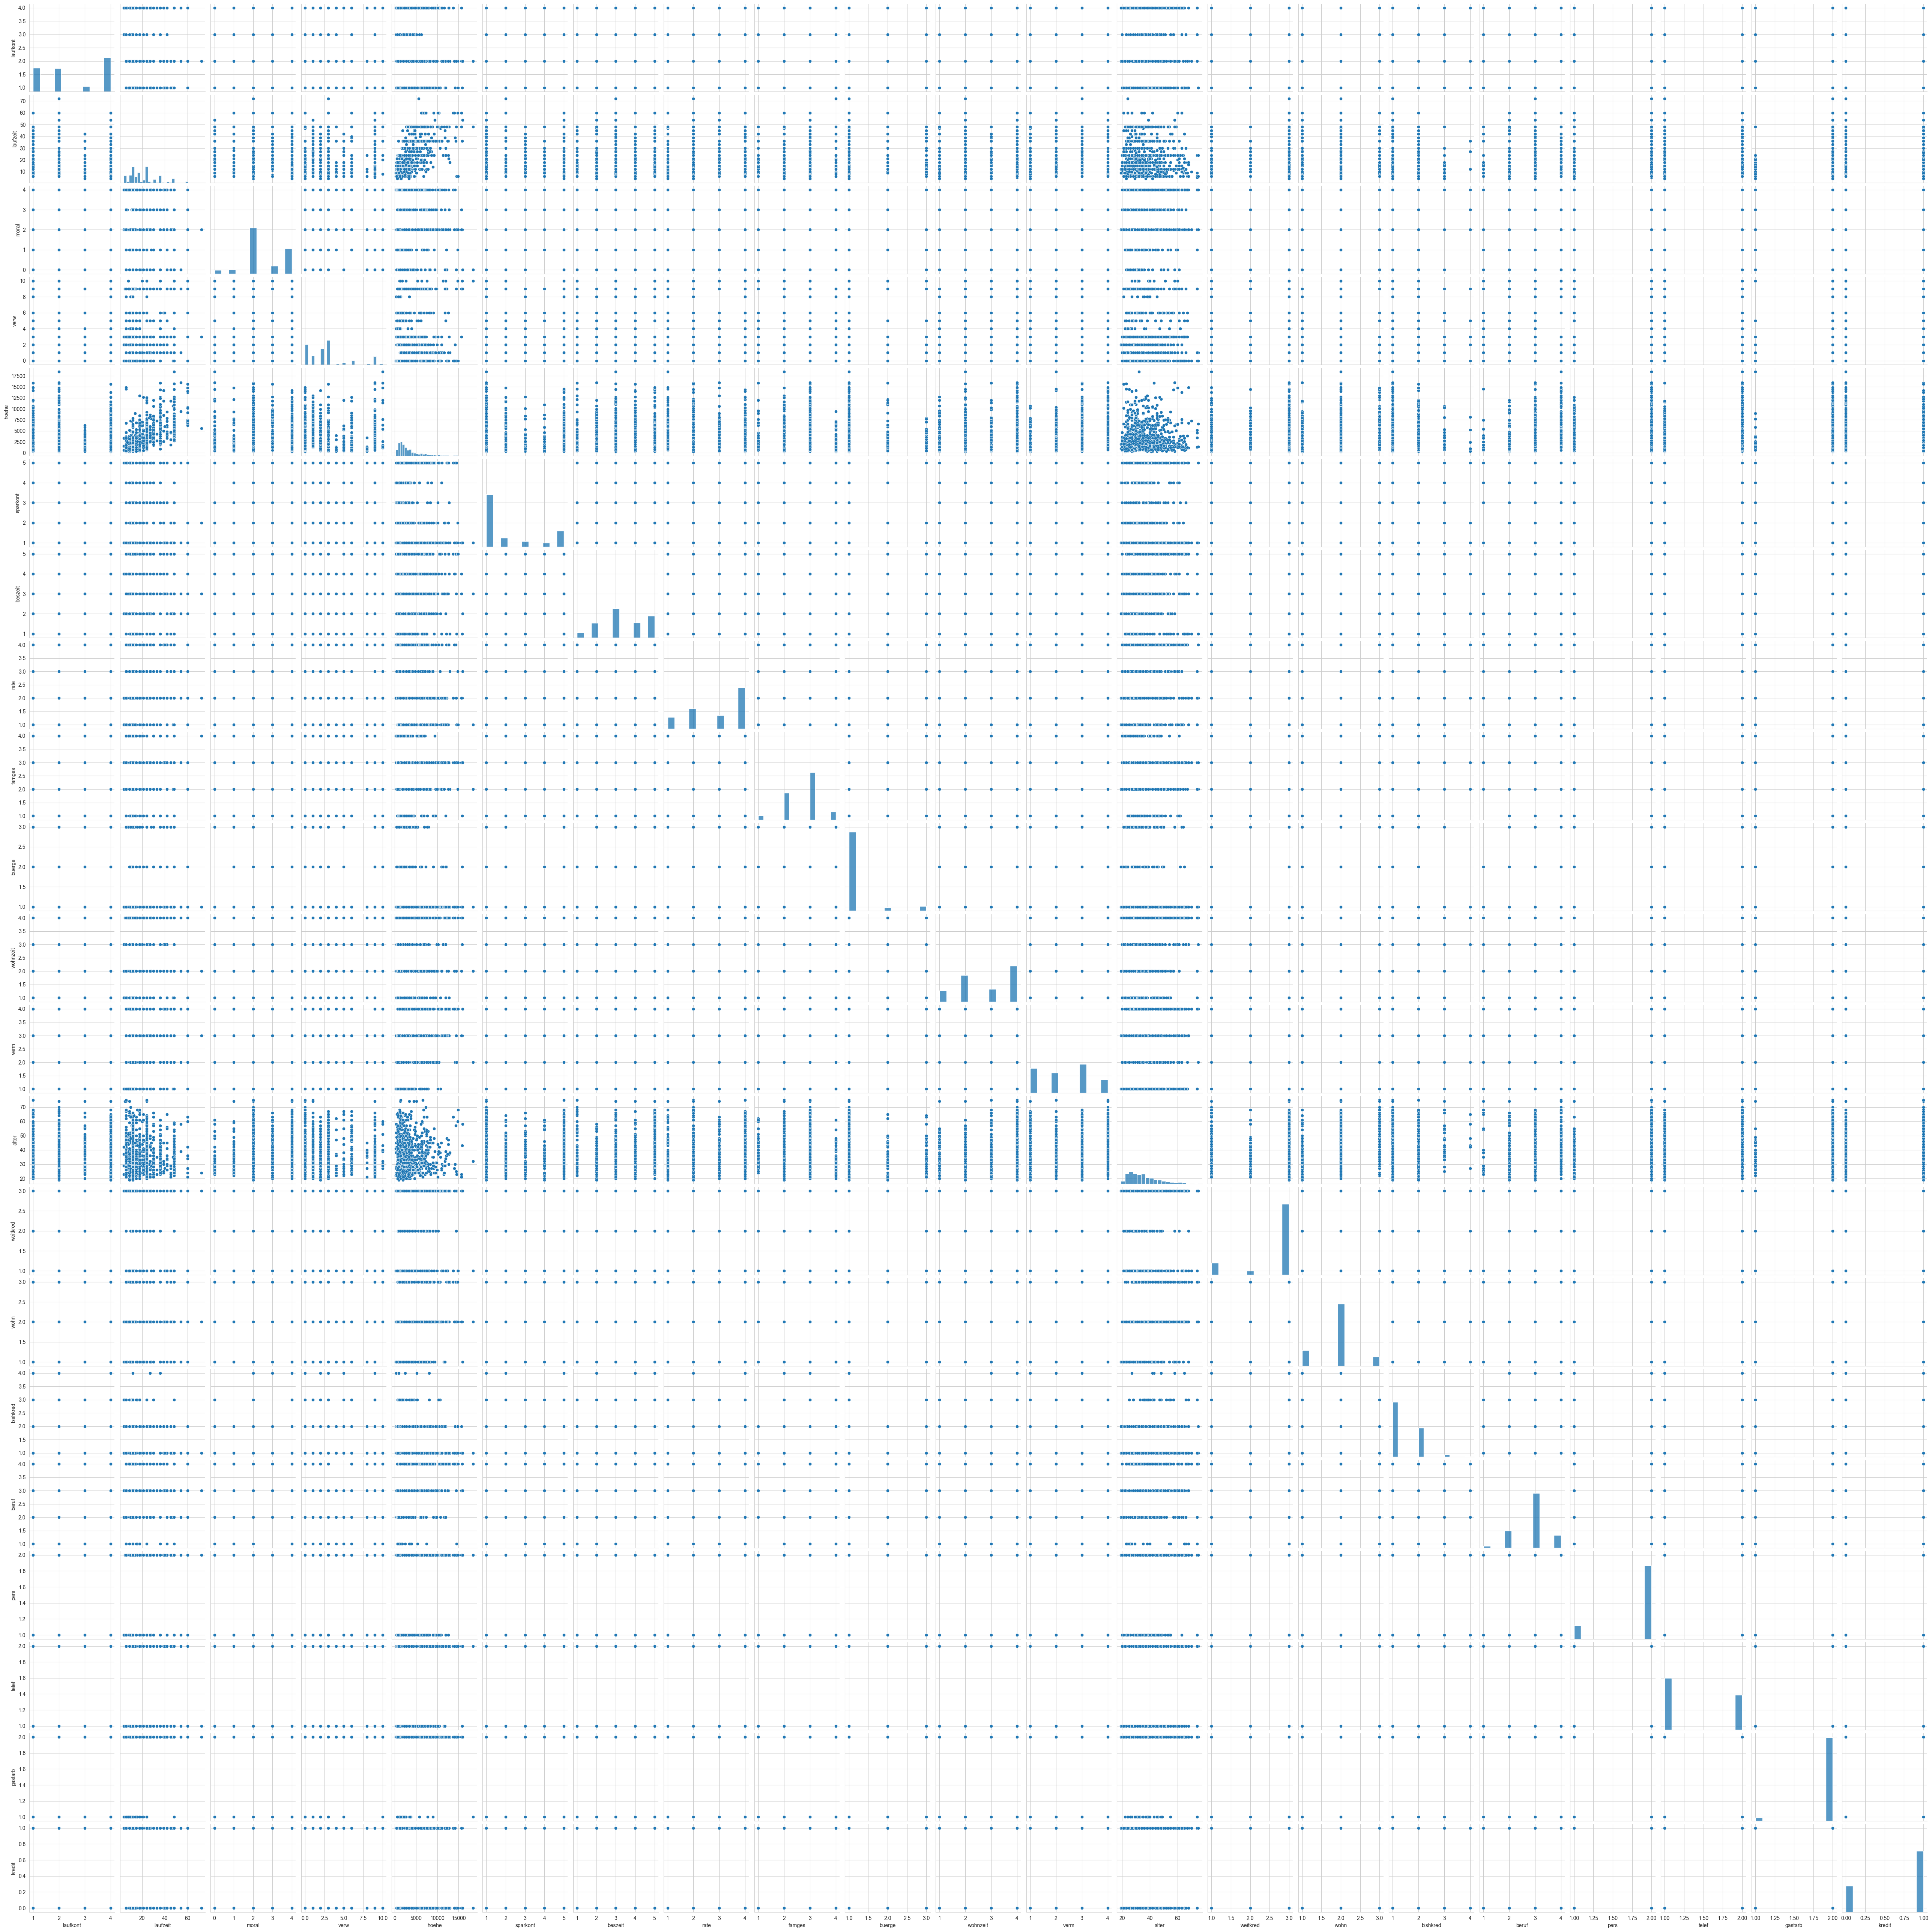

In [79]:
import seaborn as sns
sns.pairplot(SouthGermanCredit)

Süddeutscher Kredit (UPDATE). (2020). UCI-Repository für maschinelles Lernen. 
https://doi.org/10.24432/C5QG88


@misc{misc_south_german_credit_(update)_573,
  title = {{South German Credit (UPDATE)}},
  Jahr = {2020},
  howpublished = {UCI Machine Learning Repository},
  Hinweis = {{DOI}: https://doi.org/10.24432/C5QG88}
}